                                        Project : Flight Booking Price Prediction

The objective is to analyze the flight booking dataset obtained from a platform which is used to book flight tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers. Apply EDA, statistical methods and Machine learning algorithms in order to get meaningful information from it.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv(r"C:\Users\sharm\OneDrive\Desktop\Data Science\Python\Python_projects\Flight Booking Price Prediction\Flight_Booking.csv")

In [5]:
data.head(10)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


In [6]:
data = data.drop(columns = ['Unnamed: 0'])
data.head(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


In [7]:
data.shape

(300153, 11)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [9]:
data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [10]:
data.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

Now, Checking the price variation of different airlines

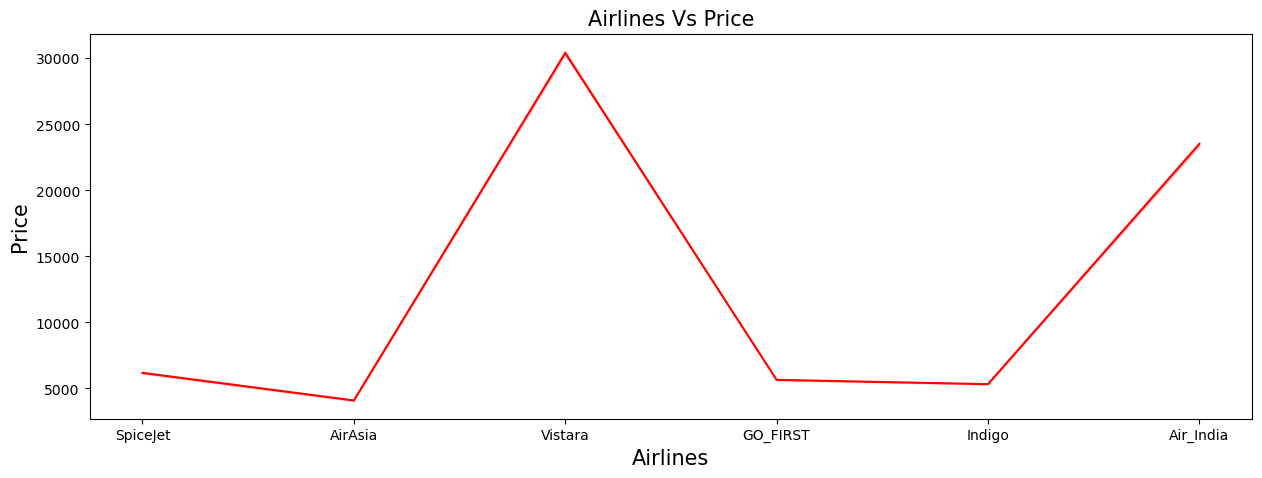

In [12]:
plt.figure(figsize = (15,5))
sns.lineplot(x = data['airline'], y = data['price'], color = 'Red')
plt.title('Airlines Vs Price', fontsize = 15)
plt.xlabel('Airlines', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.show()

Checking whether the price of the ticket increases as the days left for departure decreases

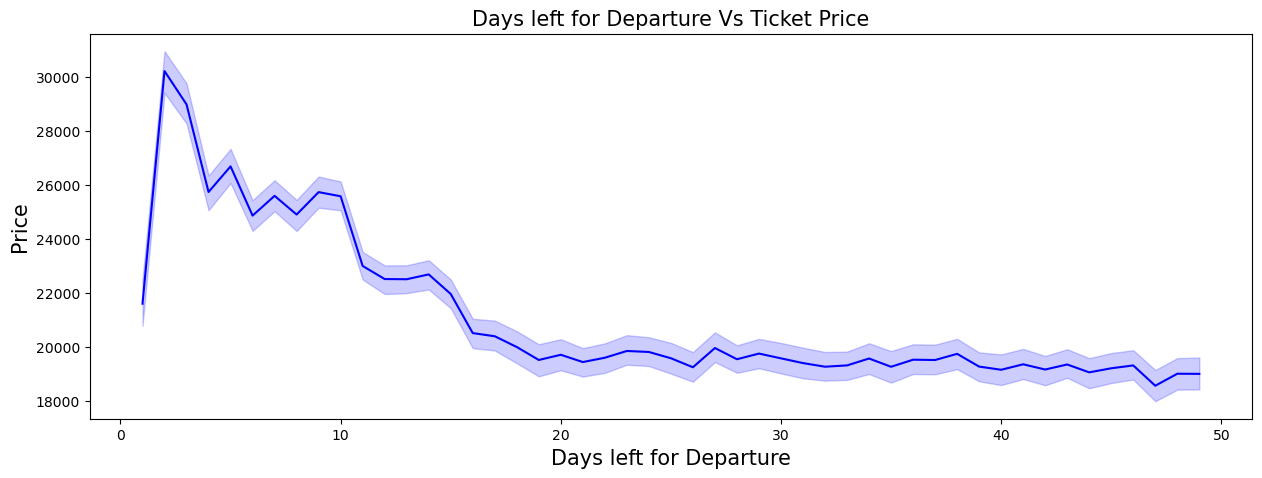

In [14]:
plt.figure(figsize = (15,5))
sns.lineplot(x = data['days_left'], y = data['price'], color = 'Blue')
plt.title('Days left for Departure Vs Ticket Price', fontsize = 15)
plt.xlabel('Days left for Departure', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.show()

Price Range of all Airlines

<Axes: xlabel='airline', ylabel='price'>

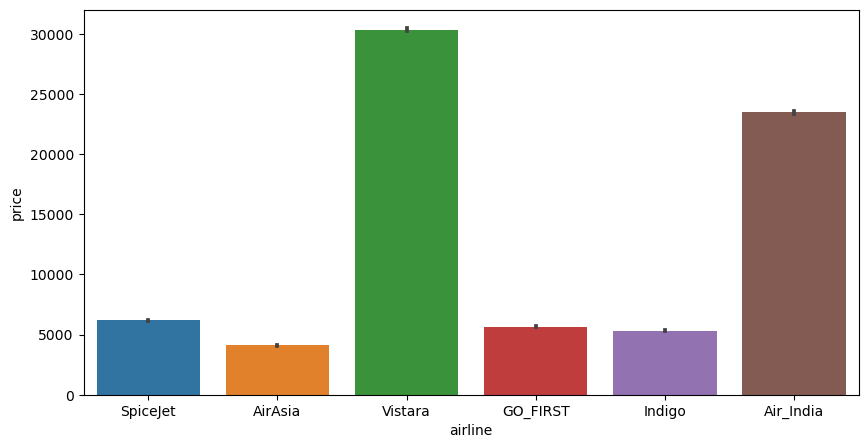

In [16]:
plt.figure(figsize = (10,5))
sns.barplot(x = data['airline'], y = data['price'])

Range of price of all the flights of Economy and Business class

<Axes: xlabel='class', ylabel='price'>

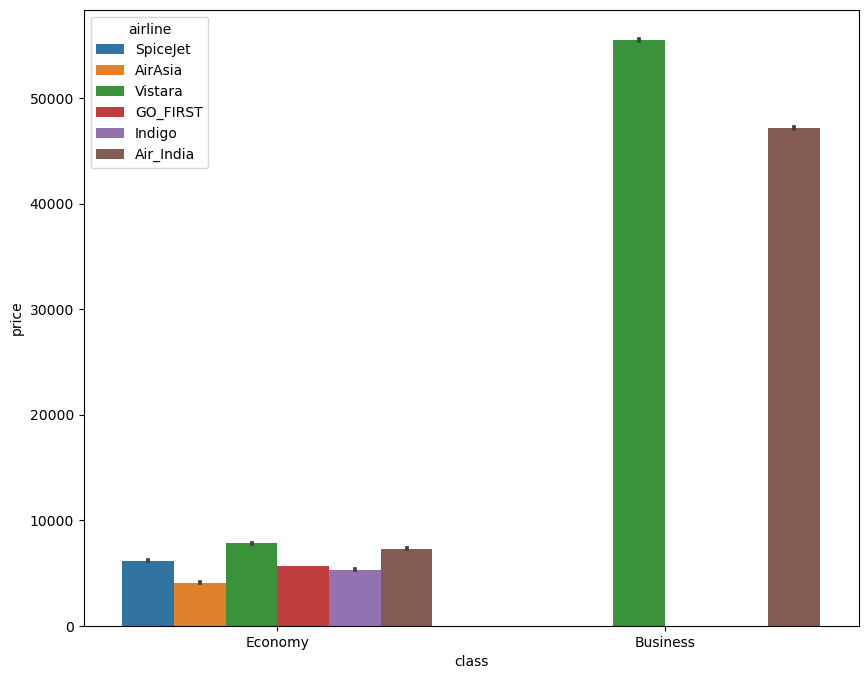

In [18]:
plt.figure(figsize = (10,8))
sns.barplot(x = data['class'], y = data['price'], hue = data['airline'])

checking whether Range of price of flights with source and destination city according to the days left

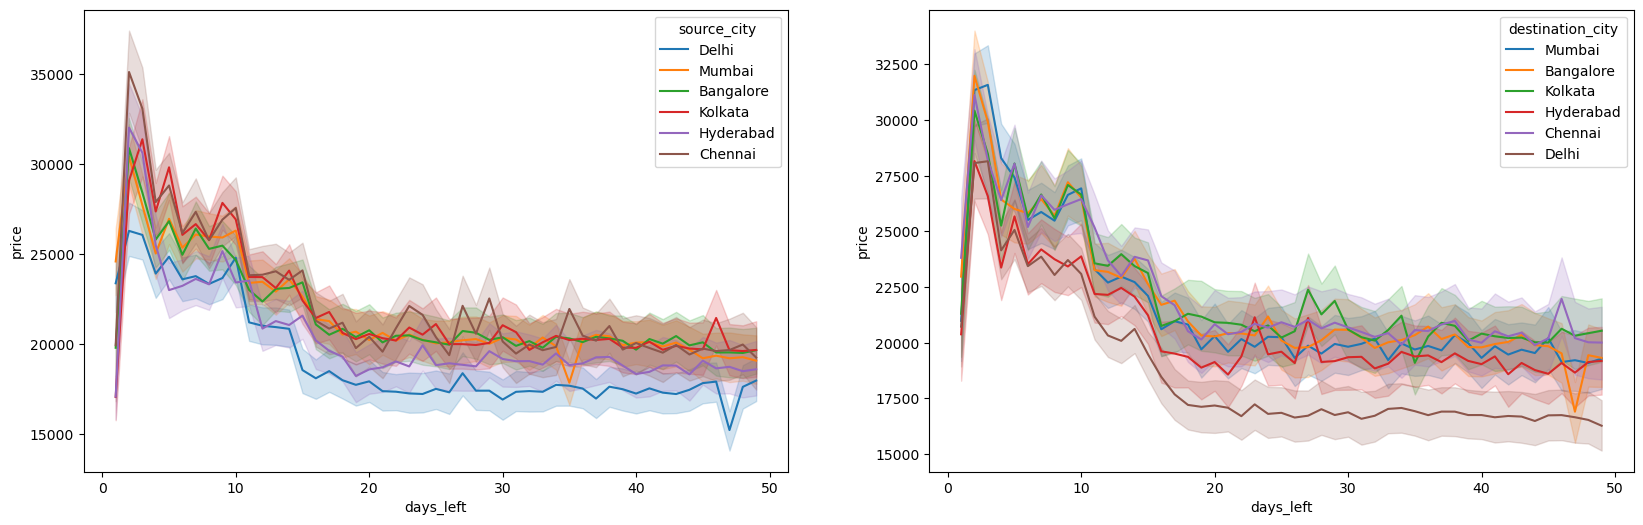

In [20]:
fig, ax = plt.subplots(1,2, figsize = (20,6))
sns.lineplot(x = data['days_left'], y = data['price'], hue = data['source_city'], ax = ax[0])
sns.lineplot(x = data['days_left'], y = data['price'], hue = data['destination_city'], ax = ax[1])
plt.show()

Visualization of categorical features with countplot

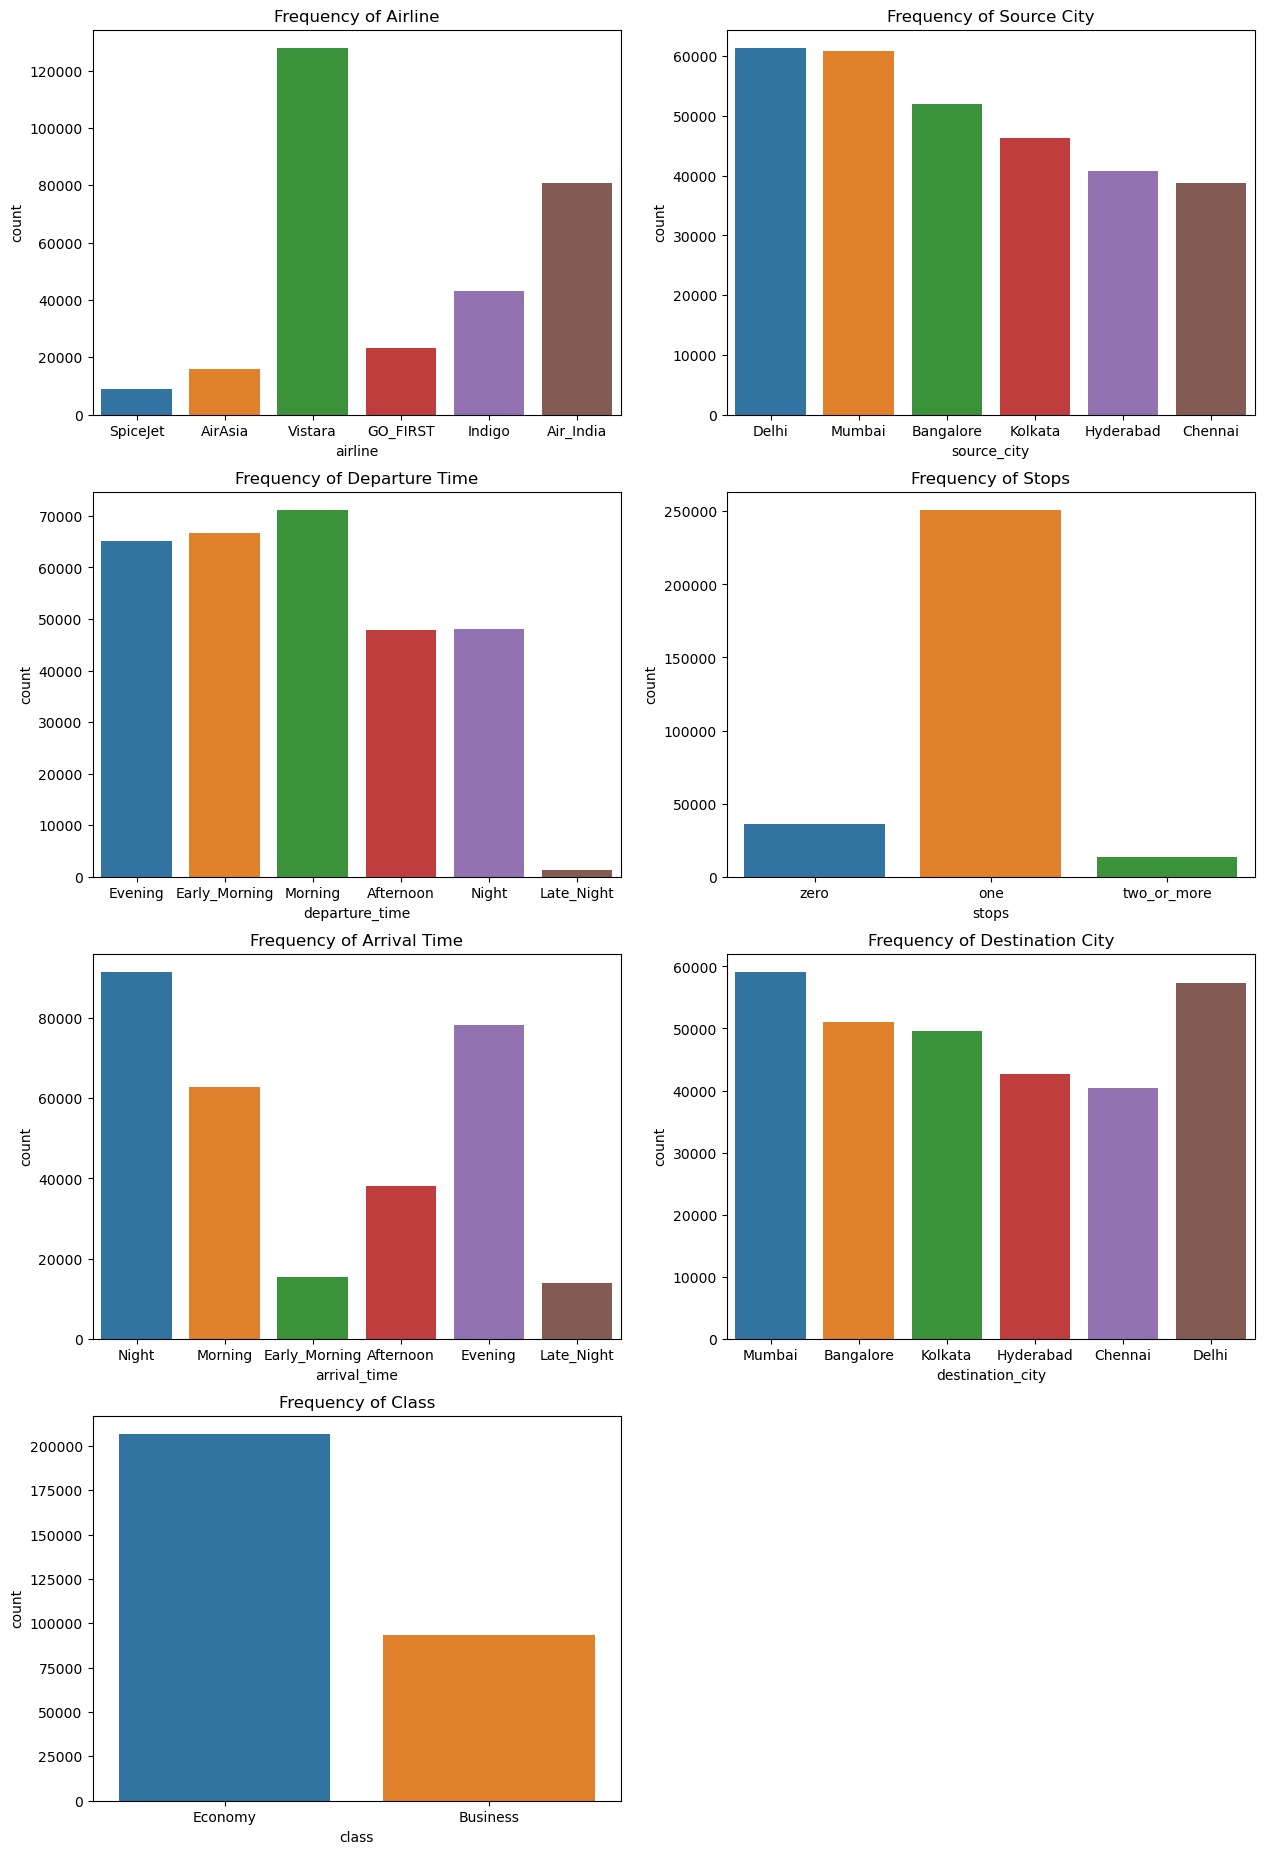

In [22]:
plt.figure(figsize = (15, 23))

plt.subplot(4,2,1)
sns.countplot(x = data['airline'])
plt.title('Frequency of Airline')

plt.subplot(4,2,2)
sns.countplot(x = data['source_city'])
plt.title('Frequency of Source City')

plt.subplot(4,2,3)
sns.countplot(x = data['departure_time'])
plt.title('Frequency of Departure Time')

plt.subplot(4,2,4)
sns.countplot(x = data['stops'])
plt.title('Frequency of Stops')

plt.subplot(4,2,5)
sns.countplot(x = data['arrival_time'])
plt.title('Frequency of Arrival Time')

plt.subplot(4,2,6)
sns.countplot(x = data['destination_city'])
plt.title('Frequency of Destination City')

plt.subplot(4,2,7)
sns.countplot(x = data['class'])
plt.title('Frequency of Class')

plt.show()

Now, perform EDA on the Data : Label Encoding (One Hot Encoding)

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [25]:
data['airline'] = le.fit_transform(data['airline'])
data['source_city'] = le.fit_transform(data['source_city'])
data['departure_time'] = le.fit_transform(data['departure_time'])
data['stops'] = le.fit_transform(data['stops'])
data['arrival_time'] = le.fit_transform(data['arrival_time'])
data['destination_city'] = le.fit_transform(data['destination_city'])
data['class'] = le.fit_transform(data['class'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int32  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(7), int64(2), object(1)
memory usage: 17.2+ MB


Plotting the correlation graph to see the correlation between features and dependent variable.

C:\Users\sharm\AppData\Local\Temp\ipykernel_5260\130459073.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm')


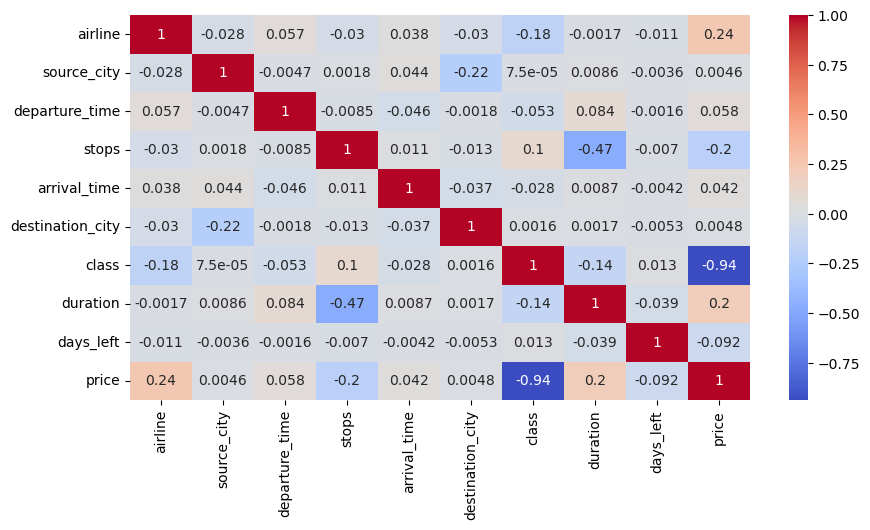

In [27]:
plt.figure(figsize = (10,5))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm')
plt.show()

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'price')):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame()
vif_data['features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

           features       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


So, all features have VIF less than 5

In [30]:
data['flight'] = pd.to_numeric(data['flight'], errors = 'coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            43120 non-null   float64
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int32  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(2), int32(7), int64(2)
memory usage: 17.2 MB


In [31]:
X = data.drop(columns = ['price', 'flight'])
Y = data['price']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)
y_pred_lr = lr.predict(X_test)

In [37]:
mean_abs_err = mean_absolute_error(Y_test, y_pred_lr)
print('Mean Absolute Error of Linear Regression : ',mean_abs_err)

mean_sq_err = mean_squared_error(Y_test, y_pred_lr)
print('Mean Squared Error of Linear Regression: ', mean_sq_err)

Mean Absolute Error of Linear Regression :  4624.994868016877
Mean Squared Error of Linear Regression:  49200540.293721996


Decision Tree Regressor

In [39]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, Y_train)
y_pred_dt = dt.predict(X_test)

In [40]:
mean_abs_err = mean_absolute_error(Y_test, y_pred_dt)
print('Mean Absolute Error of Decision Tree : ',mean_abs_err)

mean_sq_err = mean_squared_error(Y_test, y_pred_dt)
print('Mean Squared Error of Decision Tree : ', mean_sq_err)

Mean Absolute Error of Decision Tree :  1171.9193083573487
Mean Squared Error of Decision Tree :  12503454.195962641
